Import the modules that will be used.

In [1]:
import numpy as np
import matplotlib
import matplotlib.pyplot as plt

%matplotlib inline

## Exercise 11.1

Determine by counting the number of mathematical operations the complexity of:

1. Dot product between two vectors
1. Matrix-vector product
1. Matrix-matrix product

for vectors of length $n$ and matrices of size $n \times n$.

This is a reasoning exercise - you do not need to write a program. Express your answers in text and using LaTeX in a Markdown cell.


### Optional

Test the complexity experimentally with your own functions for performing the operations, and
with the NumPy 'vectorised' equivalents.

### Answer

1. Dot Product: $ O(n) $
2. Matrix-Vector Product: $ O(n^2) $
3. Matrix-Matrix Product: $ O(n^3) $

## Exercise 11.2

For the recursive factorial algorithm in Activity 04, determine the algorithmic complexity by inspecting your implementation of the algorithm. Test this against numerical experiments.

### Solution

Recall the factorial algorithm from Activity 04.4:

In [3]:
def factorial(n):
    if n == 0:
        return 1
    else:
        return factorial(n - 1) * n

The function calls itself (recursively) $n$ times, hence it has complexity $O(n)$. We test this below and plot
the times.

C:\Users\stron\AppData\Local\Temp\ipykernel_4780\892114059.py:5: RuntimeWarning: overflow encountered in scalar multiply
  return factorial(n - 1) * n


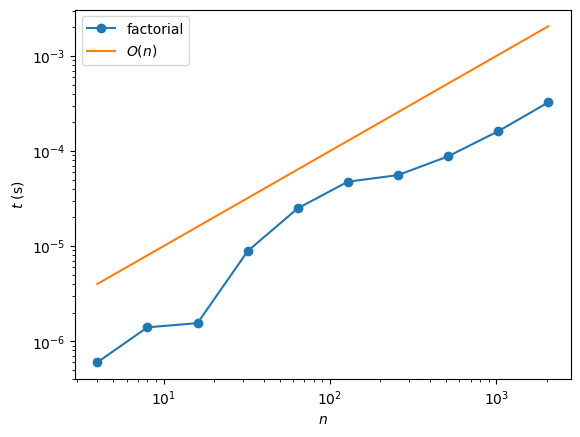

In [ ]:
# Create array of problem sizes we want to test (powers of 2)
N = 2 ** np.arange(2, 12)

times = []
for n in N:
    t = %timeit -q -n2 -r2 -o factorial(n)
    times.append(t.best)

plt.loglog(N, times, marker="o", label="factorial")

# Show reference line of O(n)
plt.loglog(N, 1e-6 * N, label="$O(n)$")

# Add labels and legend
plt.xlabel("$n$")
plt.ylabel("$t$ (s)")
plt.legend(loc=0)

plt.show()

## Exercise 11.3

Determine experimentally the complexity of computing the determinant of a matrix. You can generate an $n \times n$ matrix using:

In [15]:
n = 100
A = np.random.rand(n, n)

and the determinant can be computed by:

In [16]:
det = np.linalg.slogdet(A)

Be sure that you test for sufficiently large $n$ to get into the 'large' $n$ regime.

### Solution

Time computation of determinant:

In [23]:
# Create array of problem sizes we want to test (powers of 2)
N = 2 ** np.arange(2, 15)

times = []
for n in N:
    A = np.random.rand(n, n)
    t = %timeit -q -n2 -r2 -o np.linalg.slogdet(A)
    times.append(t.best)

Plot result:

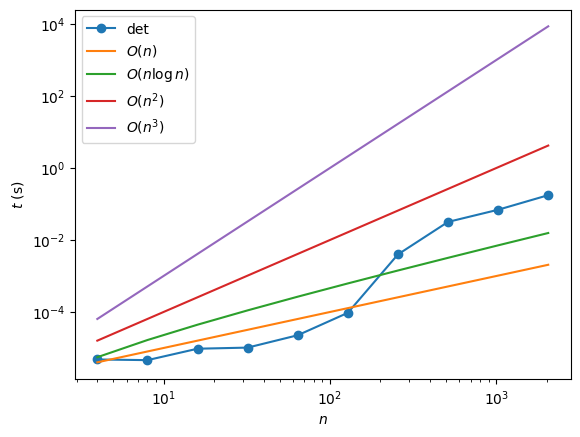

In [22]:
plt.loglog(N, times, marker="o", label="det")

# Show reference lines
plt.loglog(N, 1e-6 * N, label="$O(n)$")
plt.loglog(N, 1e-6 * N * np.log(N), label=r"$O(n \log n)$")
plt.loglog(N, 1e-6 * N**2, label=r"$O(n^2)$")
plt.loglog(N, 1e-6 * N**3, label=r"$O(n^3)$")

# Add labels and legend
plt.xlabel("$n$")
plt.ylabel("$t$ (s)")
plt.legend(loc=0)

plt.show()